In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import pandas as pd
movie = pd.read_csv("C:\\Users\\utsav\\Desktop\\Machine Learning Notes\\ml-20m\\movies.csv")
movie.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [3]:
print(movie.shape)

(27278, 3)


In [4]:
print(movie.columns)

Index(['movieId', 'title', 'genres'], dtype='object')


In [5]:
movie.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
movie.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [10]:
movie["genres"].unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance', ...,
       'Action|Adventure|Animation|Fantasy|Horror',
       'Animation|Children|Comedy|Fantasy|Sci-Fi',
       'Animation|Children|Comedy|Western'], dtype=object)

In [11]:
rt = pd.read_csv("C:\\Users\\utsav\\Desktop\\Machine Learning Notes\\ml-20m\\ratings.csv")

In [12]:
rt.shape

(20000263, 4)

In [13]:
rt.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [14]:
rt.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [15]:
good_ratings = rt[rt["rating"] > 3.5]["rating"].count()
print("There were a total of" , good_ratings , "that were above 3.5")

There were a total of 9995410 that were above 3.5


In [16]:
import seaborn
rt.hist("rating", bins = 5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000192A4637A88>]],
      dtype=object)

In [17]:
# what we need is that movie id and title
movie = movie.loc[:,["movieId","title"]]
movie.head(10)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)
6,7,Sabrina (1995)
7,8,Tom and Huck (1995)
8,9,Sudden Death (1995)
9,10,GoldenEye (1995)


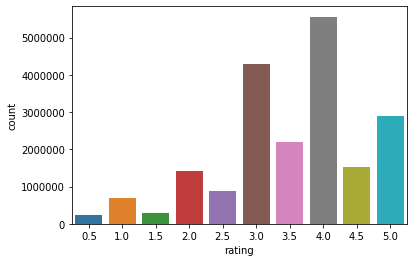

In [18]:
import seaborn as sns
sns.countplot(data = rt , x = "rating")

In [19]:
from imdb import IMDb
ia  = IMDb()

ModuleNotFoundError: No module named 'imdb'

In [ ]:
the_matrix = ia.get_movie('0133177')
print(the_matrix)

In [20]:
# import rating data and look at columsn
rating = pd.read_csv("C:\\Users\\utsav\\Desktop\\Machine Learning Notes\\ml-20m\\ratings.csv")
rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [21]:
# what we need is that user id, movie id and rating
rating = rating.loc[:,["userId","movieId","rating"]]
rating.head(10)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
5,1,112,3.5
6,1,151,4.0
7,1,223,4.0
8,1,253,4.0
9,1,260,4.0


In [5]:
# then merge movie and rating data
data = pd.merge(movie,rating)

In [6]:
# now lets look at our data 
data.head(10)

,movieId,title,userId,rating
0,1,Toy Story (1995),3,4.0
1,1,Toy Story (1995),6,5.0
2,1,Toy Story (1995),8,4.0
3,1,Toy Story (1995),10,4.0
4,1,Toy Story (1995),11,4.5
5,1,Toy Story (1995),12,4.0
6,1,Toy Story (1995),13,4.0
7,1,Toy Story (1995),14,4.5
8,1,Toy Story (1995),16,3.0
9,1,Toy Story (1995),19,5.0


In [7]:
data.shape

(20000263, 4)

In [9]:
data = data.iloc[:1000000,:]
print(data.head())

   movieId             title  userId  rating
0        1  Toy Story (1995)       3     4.0
1        1  Toy Story (1995)       6     5.0
2        1  Toy Story (1995)       8     4.0
3        1  Toy Story (1995)      10     4.0
4        1  Toy Story (1995)      11     4.5


In [12]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(data['title'])

In [16]:
from sklearn.metrics.pairwise import  cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [19]:
pivot_table = data.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
pivot_table.head(10)

title,Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),"Amazing Panda Adventure, The (1995)","American President, The (1995)",Angela (1995),Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),Assassins (1995),Babe (1995),...,Unforgettable (1996),Up Close and Personal (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Waiting to Exhale (1995),When Night Is Falling (1995),"White Balloon, The (Badkonake sefid) (1995)",White Squall (1996),Wings of Courage (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
movie_watched = pivot_table["Unforgettable (1996)"]
similarity_with_other_movies = pivot_table.corrwith(movie_watched)  
similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
similarity_with_other_movies.head()

title
Toy Story (1995)                                                  1.000000
Gospa (1995)                                                      0.516264
Shadows (Cienie) (1988)                                           0.508859
Happiness Is in the Field (Bonheur est dans le pré, Le) (1995)    0.495360
Across the Sea of Time (1995)                                     0.461406
dtype: float64

In [13]:
movie_watched = pivot_table["Vampire in Brooklyn (1995)"]
similarity_with_other_movies = pivot_table.corrwith(movie_watched)  # find correlation between "Ace Ventura: When Nature Calls (1995) " and other movies
similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
similarity_with_other_movies.head()

title
Vampire in Brooklyn (1995)                                        1.000000
Headless Body in Topless Bar (1995)                               0.889297
Gospa (1995)                                                      0.866025
Happiness Is in the Field (Bonheur est dans le pré, Le) (1995)    0.745499
Race the Sun (1996)                                               0.697001
dtype: float64

In [18]:

tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(data['title'])

In [19]:
print(tfidf_matrix)

  (0, 738)	0.44372559009084067
  (0, 699)	0.4406972236336829
  (0, 7)	0.13496799574604565
  (0, 739)	0.44372559009084067
  (0, 700)	0.44372559009084067
  (0, 740)	0.44372559009084067
  (1, 738)	0.44372559009084067
  (1, 699)	0.4406972236336829
  (1, 7)	0.13496799574604565
  (1, 739)	0.44372559009084067
  (1, 700)	0.44372559009084067
  (1, 740)	0.44372559009084067
  (2, 738)	0.44372559009084067
  (2, 699)	0.4406972236336829
  (2, 7)	0.13496799574604565
  (2, 739)	0.44372559009084067
  (2, 700)	0.44372559009084067
  (2, 740)	0.44372559009084067
  (3, 738)	0.44372559009084067
  (3, 699)	0.4406972236336829
  (3, 7)	0.13496799574604565
  (3, 739)	0.44372559009084067
  (3, 700)	0.44372559009084067
  (3, 740)	0.44372559009084067
  (4, 738)	0.44372559009084067
  :	:
  (999995, 62)	0.4458203755724012
  (999996, 7)	0.07887308553883163
  (999996, 60)	0.4458203755724012
  (999996, 223)	0.4458203755724012
  (999996, 61)	0.4458203755724012
  (999996, 224)	0.4458203755724012
  (999996, 62)	0.44582037